<a href="https://colab.research.google.com/github/linglingshere/Music-Sales-Analysis-Using-SQL/blob/main/Analisis_Data_Penjualan_Musik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALISIS DATA PENJUALAN LAGU DALAM SUATU PERUSAHAAN

In [18]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
data_path='/content/drive/MyDrive/DSC 2022/Pertemuan 3/chinook.db'

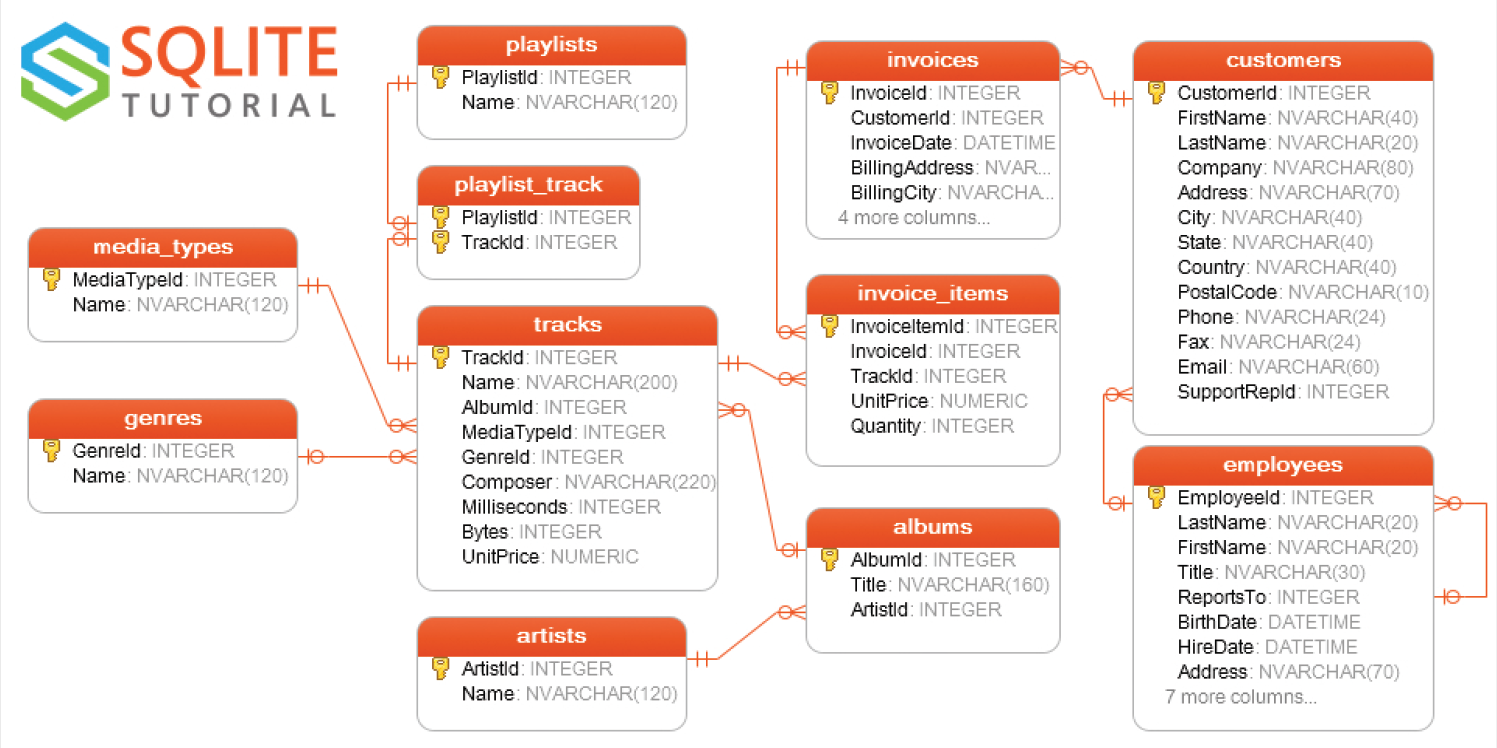

1. Data Karyawan Perusahaan

In [20]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(data_path)
query = "SELECT * FROM employees"
employees = pd.read_sql_query(query,conn)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


2. Apa saja judul album beserta jumlahnya yang dijual di toko ini?

In [ ]:
query = "SELECT * FROM albums"
albums = pd.read_sql_query(query, conn)
albums['Title'].value_counts()

,count
Title,
For Those About To Rock We Salute You,1
"Lost, Season 3",1
Rattle And Hum,1
Pop,1
How To Dismantle An Atomic Bomb,1
...,...
Sex Machine,1
Virtual XI,1
The X Factor,1


3. Sebutkan nama-nama track yang ada pada setiap album dan sebutkan jumlahnya

In [ ]:
query = """SELECT albums.Title AS Nama_Album, tracks.name AS Nama_Track
FROM albums
JOIN tracks ON albums.albumid = tracks.albumid
"""

pd.read_sql_query(query,conn)

,Nama_Album,Nama_Track
0,For Those About To Rock We Salute You,For Those About To Rock (We Salute You)
1,For Those About To Rock We Salute You,Put The Finger On You
2,For Those About To Rock We Salute You,Let's Get It Up
3,For Those About To Rock We Salute You,Inject The Venom
4,For Those About To Rock We Salute You,Snowballed
...,...,...
3498,Respighi:Pines of Rome,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...
3499,Schubert: The Late String Quartets & String Qu...,"String Quartet No. 12 in C Minor, D. 703 ""Quar..."
3500,Monteverdi: L'Orfeo,"L'orfeo, Act 3, Sinfonia (Orchestra)"
3501,Mozart: Chamber Music,"Quintet for Horn, Violin, 2 Violas, and Cello ..."


4. Album apa yang memiliki track terbanyak?

In [ ]:
query = """
SELECT albums.Title AS Nama_Album, COUNT(tracks.name) AS Jumlah_Track
FROM albums
JOIN tracks ON albums.albumid = tracks.albumid
GROUP BY Nama_Album
ORDER BY Jumlah_Track DESC
"""

album_track_terbanyak = pd.read_sql_query(query,conn)['Nama_Album'][0]
album_track_terbanyak

'Greatest Hits'

5. Sebutkan semua track dari album "Greatest Hits"

In [ ]:
query = """
SELECT albums.Title AS Nama_Album, tracks.name AS Nama_Track
FROM albums
JOIN tracks ON albums.albumid = tracks.albumid
WHERE Nama_Album == 'Greatest Hits'
"""
pd.read_sql_query(query,conn)

,Nama_Album,Nama_Track
0,Greatest Hits,Are You Gonna Go My Way
1,Greatest Hits,Fly Away
2,Greatest Hits,Rock And Roll Is Dead
3,Greatest Hits,Again
4,Greatest Hits,It Ain't Over 'Til It's Over
5,Greatest Hits,Can't Get You Off My Mind
6,Greatest Hits,Mr. Cab Driver
7,Greatest Hits,American Woman
8,Greatest Hits,Stand By My Woman
9,Greatest Hits,Always On The Run


5. Sebutkan nama-nama artis dari masing-masing album

In [ ]:
query = """
SELECT name AS Artists, title AS Album
FROM artists
JOIN albums ON artists.artistid = albums.artistid
"""

artist_albums = pd.read_sql_query(query, conn)
artist_albums

,Artists,Album
0,AC/DC,For Those About To Rock We Salute You
1,Accept,Balls to the Wall
2,Accept,Restless and Wild
3,AC/DC,Let There Be Rock
4,Aerosmith,Big Ones
...,...,...
342,Eugene Ormandy,Respighi:Pines of Rome
343,Emerson String Quartet,Schubert: The Late String Quartets & String Qu...
344,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",Monteverdi: L'Orfeo
345,Nash Ensemble,Mozart: Chamber Music


6. Berapa umur masing-masing pegawai di perusahaan ini?

In [ ]:
query = """
SELECT LastName, FirstName, BirthDate, date('now') - strftime('%Y', BirthDate) AS Age
FROM employees
"""
pd.read_sql_query(query, conn, parse_dates='BirthDate') #Parse = untuk mengonversi dari string ke tanggal/waktu dan jenis angka

,LastName,FirstName,BirthDate,Age
0,Adams,Andrew,1962-02-18,62
1,Edwards,Nancy,1958-12-08,66
2,Peacock,Jane,1973-08-29,51
3,Park,Margaret,1947-09-19,77
4,Johnson,Steve,1965-03-03,59
5,Mitchell,Michael,1973-07-01,51
6,King,Robert,1970-05-29,54
7,Callahan,Laura,1968-01-09,56


7. Artis yang lagunya paling banyak dibeli di Kanada tahun 2010

In [ ]:
query ="""
SELECT artists.name AS 'Nama_Artis',
title AS 'Nama_Album',
tracks.name AS 'Judul_Lagu',
Quantity AS 'Jumlah',
strftime('%Y', InvoiceDate) AS 'Tahun',
country AS 'Negara'
FROM artists
LEFT JOIN albums USING(artistid)
LEFT JOIN tracks USING(albumid)
LEFT JOIN invoice_items USING(trackid)
LEFT JOIN invoices USING(invoiceid)
LEFT JOIN customers USING(customerid)
WHERE country == 'Canada' AND Tahun == '2010'
"""

artis = pd.read_sql_query(query, conn, parse_dates='InvoiceDate')['Nama_Artis'].value_counts().index[0]
artis

'Metallica'

In [ ]:
query ="""
SELECT artists.name AS 'Nama_Artis',
title AS 'Nama_Album',
tracks.name AS 'Judul_Lagu',
Quantity AS 'Jumlah',
strftime('%Y', InvoiceDate) AS 'Tahun',
country AS 'Negara'
FROM artists
LEFT JOIN albums USING(artistid)
LEFT JOIN tracks USING(albumid)
LEFT JOIN invoice_items USING(trackid)
LEFT JOIN invoices USING(invoiceid)
LEFT JOIN customers USING(customerid)
WHERE country == 'Canada' AND Tahun == '2010' AND Nama_Artis == 'Metallica'
"""

artis_terlaris = pd.read_sql_query(query, conn, parse_dates='InvoiceDate')
artis_terlaris

,Nama_Artis,Nama_Album,Judul_Lagu,Jumlah,Tahun,Negara
0,Metallica,Black Album,Nothing Else Matters,1,2010,Canada
1,Metallica,Garage Inc. (Disc 2),Last Caress/Green Hell,1,2010,Canada
2,Metallica,Ride The Lightning,Ride The Lightning,1,2010,Canada
3,Metallica,Ride The Lightning,The Call Of Ktulu,1,2010,Canada
4,Metallica,St. Anger,My World,1,2010,Canada
5,Metallica,...And Justice For All,Blackened,1,2010,Canada
6,Metallica,...And Justice For All,The Frayed Ends Of Sanity,1,2010,Canada


8. Album yang paling banyak dibeli di Kanada dan Jerman pada tahun 2010 dan 2011

In [ ]:
query ="""
SELECT albums.title AS 'Nama_Album',
strftime('%Y', InvoiceDate) AS 'Tahun',
country AS 'Negara'
FROM albums
LEFT JOIN tracks USING(albumid)
LEFT JOIN invoice_items USING(trackid)
LEFT JOIN invoices USING(invoiceid)
LEFT JOIN customers USING(customerid)
WHERE Negara == 'Canada' OR Negara = 'Germany' AND Tahun == '2010' OR Tahun == '2011'
"""

album = pd.read_sql_query(query, conn, parse_dates='InvoiceDate')['Nama_Album'].value_counts().index[0]
album

'Vinícius De Moraes - Sem Limite'

9. Genre apa yang paling populer?

In [ ]:
query = """
SELECT genres.name AS 'Nama_Genre'
FROM invoice_items
LEFT JOIN tracks ON tracks.trackid = invoice_items.trackid
LEFT JOIN genres ON genres.genreid = tracks.genreid
"""

genre_terlaris = pd.read_sql_query(query, conn)['Nama_Genre'].value_counts().index[0]
genre_terlaris

'Rock'

10. Sebutkan artis yang albumnya terjual paling banyak tahun 2012.

In [ ]:
query ="""
SELECT artists.name AS 'Nama_Artis',
title AS 'Nama_Album',
strftime('%Y', InvoiceDate) AS 'Tahun'
FROM artists
LEFT JOIN albums USING(artistid)
LEFT JOIN tracks USING(albumid)
LEFT JOIN invoice_items USING(trackid)
LEFT JOIN invoices USING(invoiceid)
LEFT JOIN customers USING(customerid)
WHERE Tahun == '2012'
"""

artis_terlaris = pd.read_sql_query(query, conn, parse_dates='InvoiceDate')['Nama_Album'].count_values().index[0]
artis_terlaris

'The Office, Season 3'

11. Total Penjualan Tiap Negara (dalam USD)

In [13]:
query = """
SELECT country AS 'Negara', SUM(UnitPrice) AS 'Total_Penjualan'
FROM customers
LEFT JOIN invoices USING(Customerid)
LEFT JOIN invoice_items USING(Invoiceid)
GROUP BY country
ORDER BY Total_Penjualan DESC
"""

penjualan_tiap_negara = pd.read_sql_query(query,conn)
penjualan_tiap_negara

,Negara,Total_Penjualan
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


12. Top-Selling Album

In [17]:
query = """
SELECT title AS 'Judul_Album', SUM(invoice_items.UnitPrice) AS 'Total_Penjualan_Album'
FROM albums
LEFT JOIN tracks USING(Albumid)
LEFT JOIN invoice_items USING(Trackid)
GROUP BY title
ORDER BY Total_Penjualan_Album DESC
LIMIT 10
"""

total_penjualan_tiap_album = pd.read_sql_query(query,conn)
total_penjualan_tiap_album

,Judul_Album,Total_Penjualan_Album
0,"Battlestar Galactica (Classic), Season 1",35.82
1,"The Office, Season 3",31.84
2,Minha Historia,26.73
3,"Lost, Season 2",25.87
4,"Heroes, Season 1",25.87
5,Greatest Hits,25.74
6,Unplugged,24.75
7,"Battlestar Galactica, Season 3",23.88
8,"Lost, Season 3",21.89
9,Acústico,21.78


13. Total Penjualan Track untuk tahun 2012

In [24]:
query = """
SELECT name AS 'Judul_Lagu',
SUM(invoice_items.UnitPrice) AS 'Total_Penjualan_Track',
strftime('%Y', InvoiceDate) AS 'Tahun'
FROM tracks
LEFT JOIN invoice_items USING(Trackid)
LEFT JOIN invoices USING(Invoiceid)
LEFT JOIN customers USING(Customerid)
WHERE Tahun == '2012'
GROUP BY name
ORDER BY Total_Penjualan_Track DESC
LIMIT 10
"""

total_penjualan_tiap_album = pd.read_sql_query(query,conn)
total_penjualan_tiap_album

,Judul_Lagu,Total_Penjualan_Track,Tahun
0,"There's No Place Like Home, Pt. 3",1.99,2012
1,The Passage,1.99,2012
2,"The Living Legend, Pt. 2",1.99,2012
3,The Job,1.99,2012
4,The Initiation,1.99,2012
5,The Hard Part,1.99,2012
6,"The Gun On Ice Planet Zero, Pt. 2",1.99,2012
7,The Coup,1.99,2012
8,The Convict,1.99,2012
9,The Convention,1.99,2012
